# Import 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.utils import check_array
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data

In [2]:
import os
os.chdir('C:/Users/ASHISH/Desktop/regression exam/Linear Regression/Linear Regression')

In [3]:
data = pd.read_csv( "GlobalWarming.csv" )

In [4]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
Year        308 non-null int64
Month       308 non-null int64
MEI         308 non-null float64
CO2         308 non-null float64
CH4         308 non-null float64
N2O         308 non-null float64
CFC11       308 non-null float64
CFC12       308 non-null float64
TSI         308 non-null float64
Aerosols    308 non-null float64
Temp        308 non-null float64
dtypes: float64(9), int64(2)
memory usage: 26.5 KB


# Data Exploring

# Distribution of variables

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


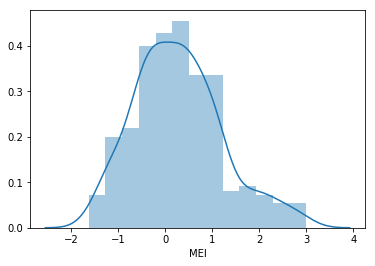

In [6]:
sns.distplot(data.MEI)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


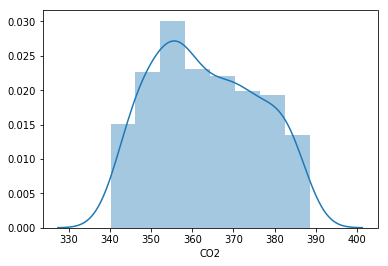

In [7]:
sns.distplot(data.CO2)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


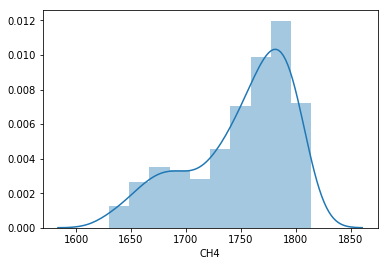

In [8]:
sns.distplot(data.CH4)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


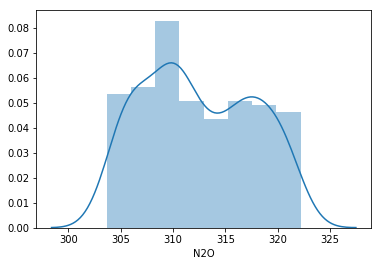

In [9]:
sns.distplot(data.N2O)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


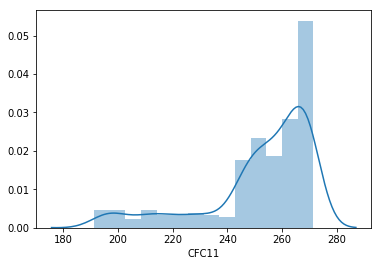

In [10]:
sns.distplot(data["CFC11"])

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


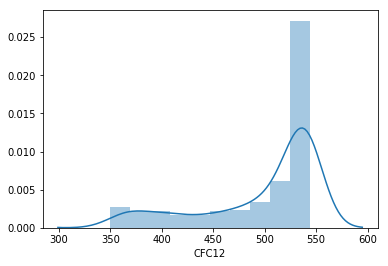

In [11]:
sns.distplot(data["CFC12"])

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


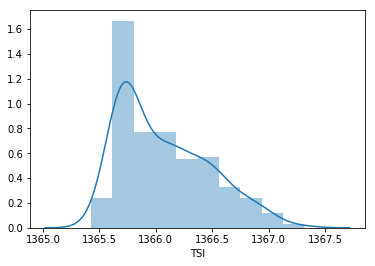

In [12]:
sns.distplot(data.TSI)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


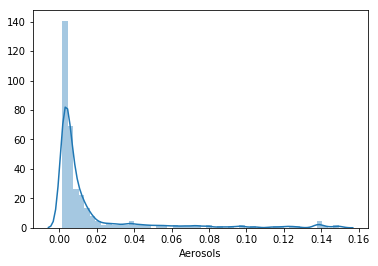

In [13]:
sns.distplot(data.Aerosols)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


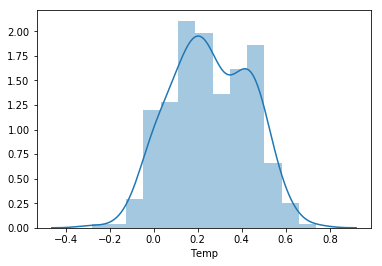

In [14]:
sns.distplot(data.Temp)

# Is there a relationship between Temp and various parameters given?

Temp Vs. MEI

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


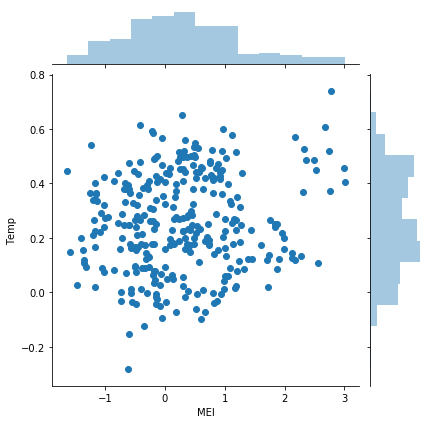

In [15]:
sns.jointplot(data.MEI, data.Temp)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


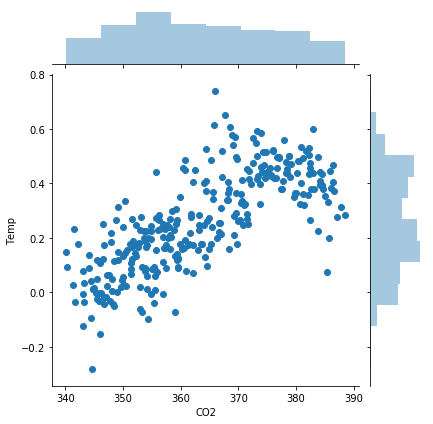

In [16]:
sns.jointplot(data.CO2, data.Temp)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


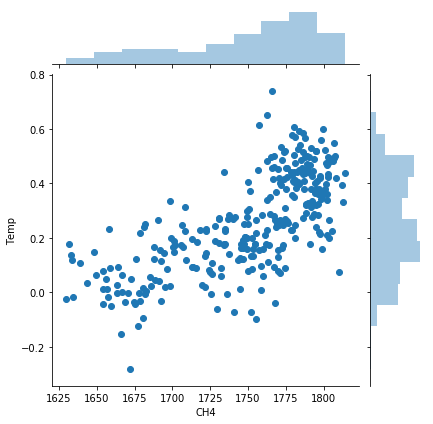

In [17]:
sns.jointplot(data.CH4, data.Temp)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


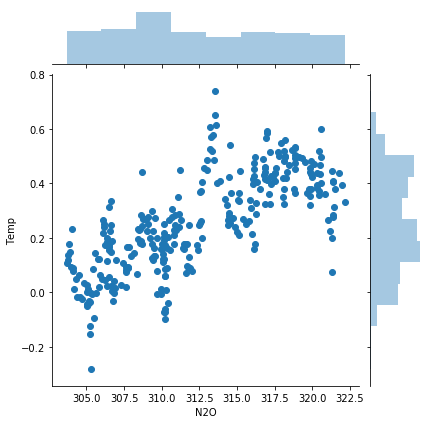

In [18]:
sns.jointplot(data.N2O, data.Temp)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


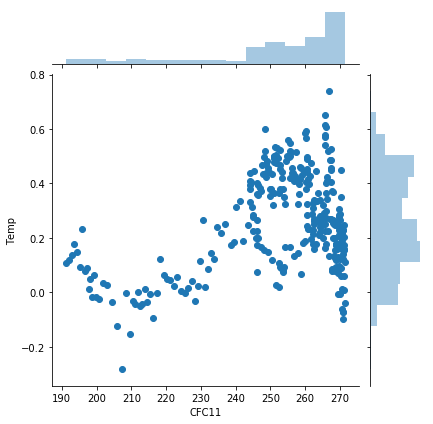

In [19]:
sns.jointplot(data["CFC11"], data.Temp)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


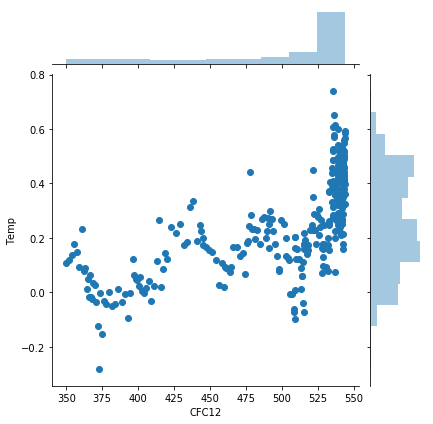

In [20]:
sns.jointplot(data["CFC12"], data.Temp)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


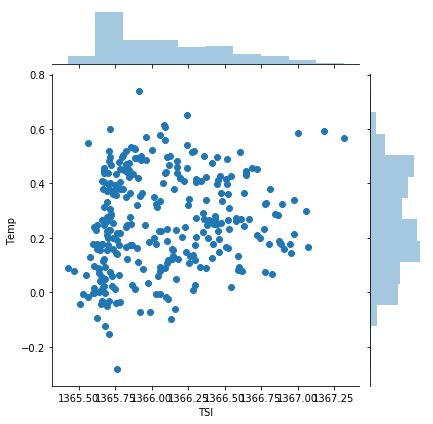

In [21]:
sns.jointplot(data.TSI, data.Temp)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


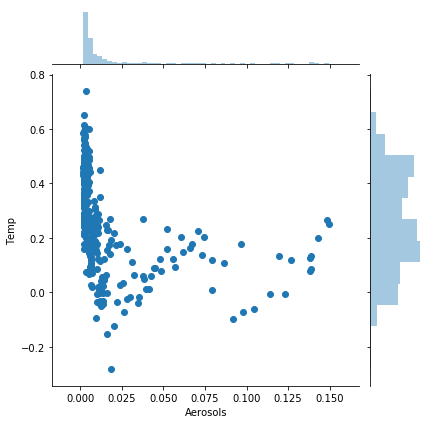

In [22]:
sns.jointplot(data.Aerosols, data.Temp)

# Visualizing pairwise correleation

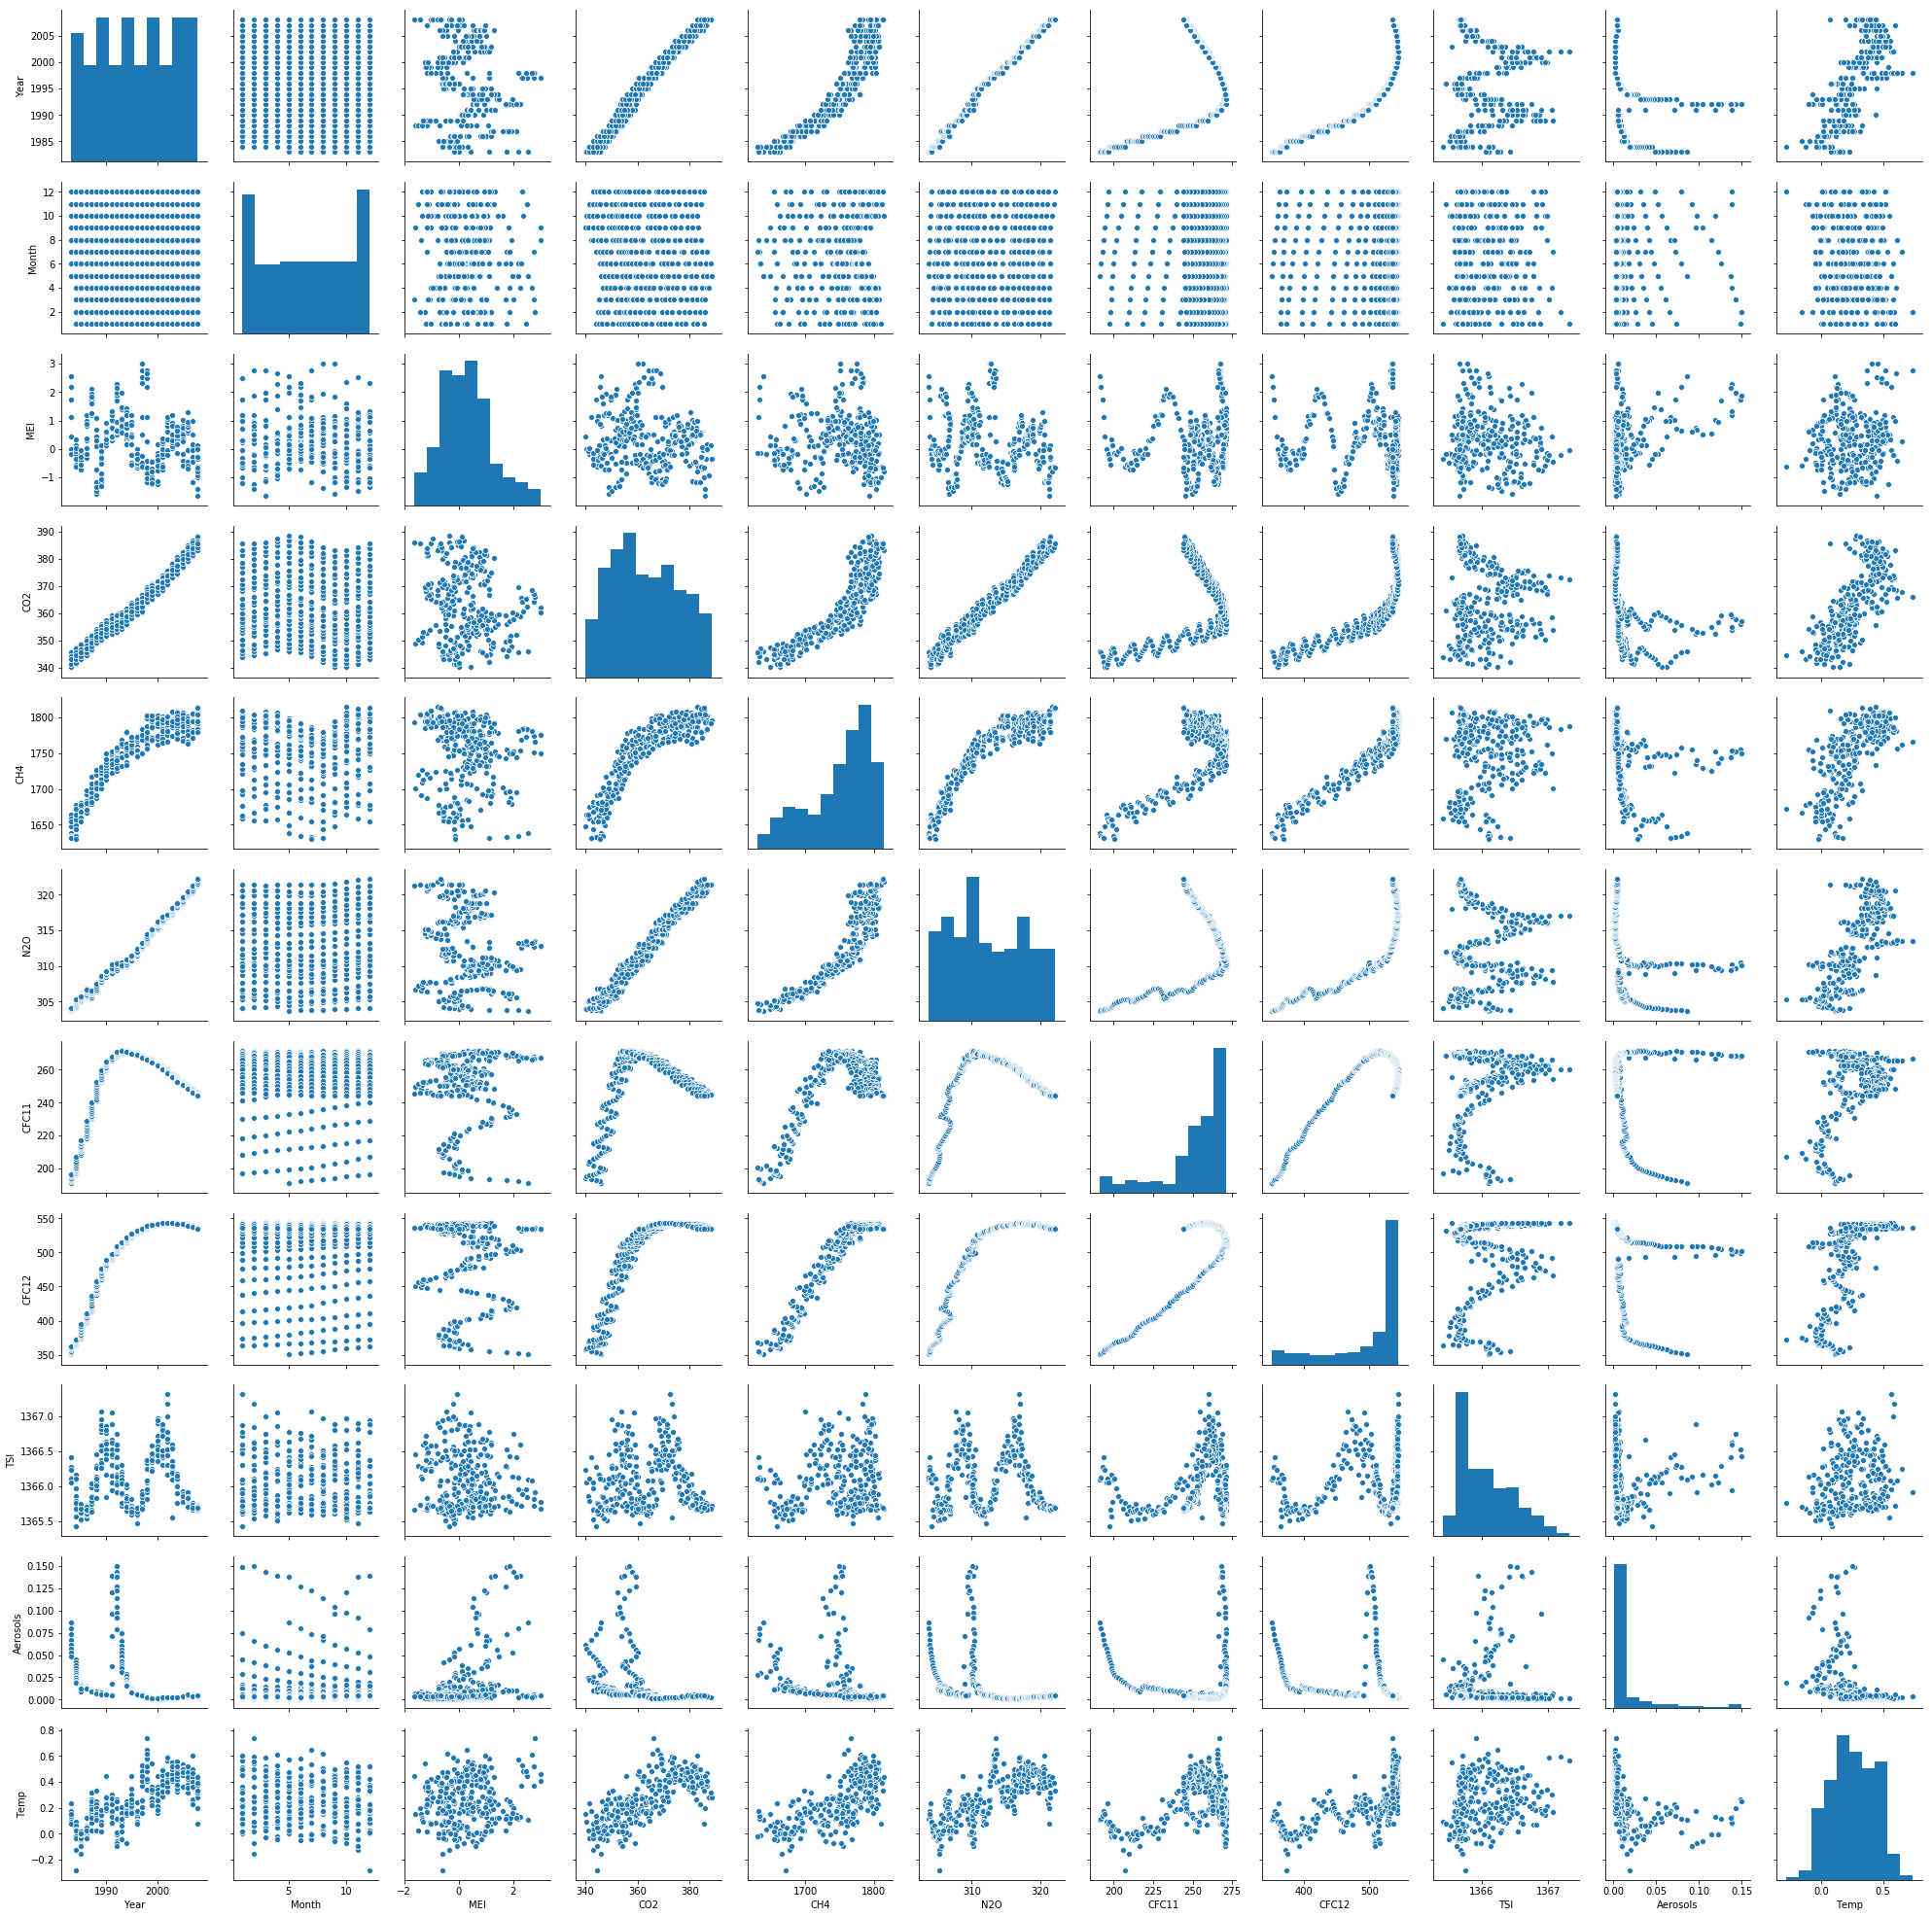

In [23]:
sns.pairplot(data)

#  correlations

In [24]:
data.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


#  correlation visualization through heatmap

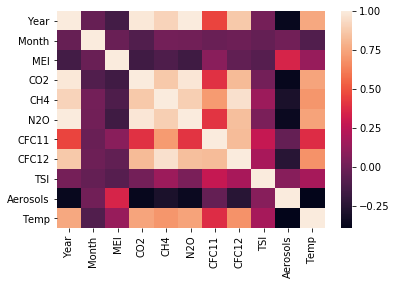

In [25]:
sns.heatmap(data.corr())

In [26]:
def check_linearity(x1, df, title):
    sns.regplot(x = x1, y= 'Temp', data= df, logistic= True).set_title(title)
    plt.show()

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


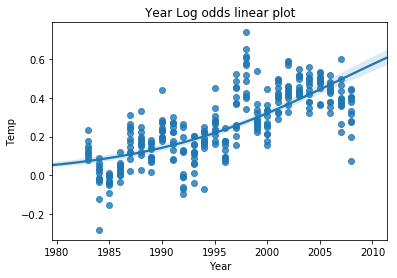

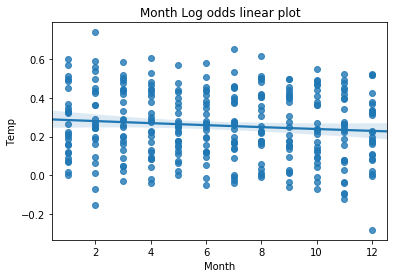

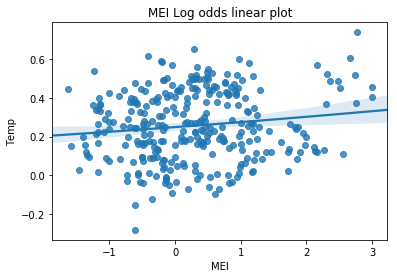

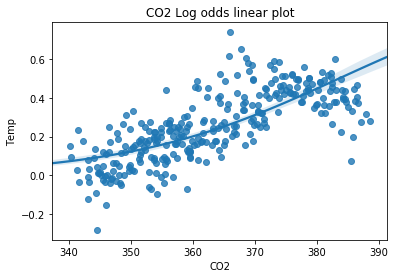

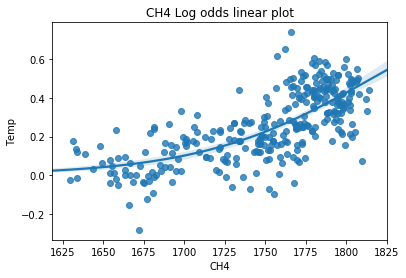

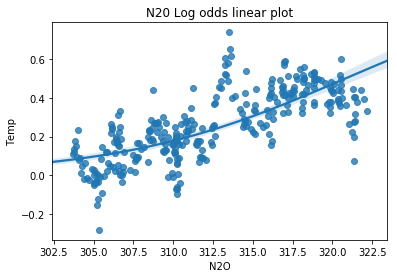

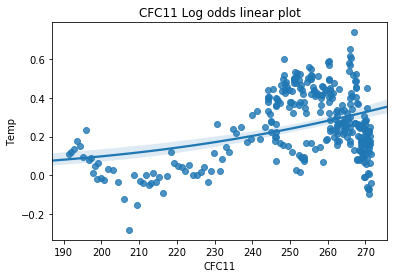

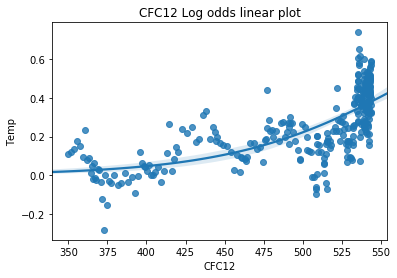

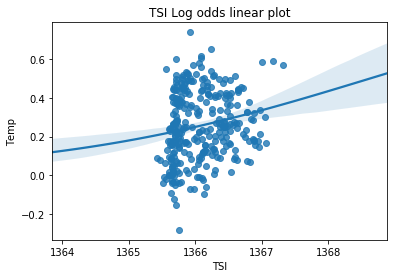

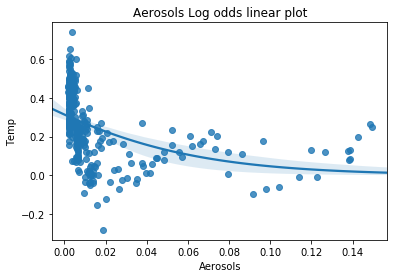

In [27]:
df2 = data


check_linearity('Year',     df2, title = 'Year Log odds linear plot')
check_linearity('Month',    df2, title = 'Month Log odds linear plot')
check_linearity('MEI',      df2, title = 'MEI Log odds linear plot')
check_linearity('CO2',      df2, title = 'CO2 Log odds linear plot')
check_linearity('CH4',      df2, title = 'CH4 Log odds linear plot')
check_linearity('N2O',      df2, title = 'N20 Log odds linear plot')
check_linearity('CFC11',   df2, title = 'CFC11 Log odds linear plot')
check_linearity('CFC12',   df2, title = 'CFC12 Log odds linear plot')
check_linearity('TSI',      df2, title = 'TSI Log odds linear plot')
check_linearity('Aerosols', df2, title = 'Aerosols Log odds linear plot')


# Simple Linear Regression model

In [28]:
data_df = data.drop(labels = "Temp", axis =1)

In [29]:
data_df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619


# Spiliting train and test 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(data_df, data.Temp, test_size=0.3)

In [31]:
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (215, 10)
x_test  (93, 10)
y_train  (215,)
y_test  (93,)


In [32]:
# Building Linear Regression model using OLS 
model1 = sm.OLS(y_train, x_train).fit()

In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     216.5
Date:                Tue, 04 Dec 2018   Prob (F-statistic):          3.90e-103
Time:                        17:20:34   Log-Likelihood:                 206.01
No. Observations:                 215   AIC:                            -392.0
Df Residuals:                     205   BIC:                            -358.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year          -0.0455      0.009     -5.246      0.000      -0.063      -0.028
Month         -0.0063      0.002     -2.761      0.006      -0.011      -0.002
MEI            0.0770      0.008      9.605      0.000       0.061       0.093
CO2            0.0036      0.003      1.030      0.304      -0.003       0.010
CH4           -0.0002      0.001     -0.313      0.755      -0.002       0.001
N2O            0.0381      0.013      2.909      0.004       0.012       0.064
CFC11         -0.0095      0.002     -4.903      0.000      -0.013      -0.006
CFC12          0.0063      0.001      5.332      0.000       0.004       0.009
TSI            0.0567      0.011      5.246      0.000       0.035       0.078
Aerosols      -1.7970      0.248     -7.241      0.000      -2.286      -1.308
==============================================================================
Omnibus:                        2.245   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                1.868
Skew:                           0.191   Prob(JB):                        0.393
Kurtosis:                       3.249   Cond. No.                     1.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
def rmse(predictions, targets):

    differences = predictions - targets                       # the DIFFERENCEs.

    differences_squared = differences ** 2                    # the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^

    return rmse_val 

In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_array(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [36]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)
# Predicting the model on test data
predictions1 = model1.predict(x_test)

In [37]:
tmp1 = pd.Series({'Model': " Base Linear Regression Model",
                 'R-Squared Value' : model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                 'RMSE': rmse(predictions1, y_test),
                 'MAPE':mean_absolute_percentage_error(predictions1, y_test)})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE,MAPE
0,Base Linear Regression Model,0.913504,0.909285,0.089079,383.112562


# Multicollinearity

# Variance Inflation Factor(VIF) calculation

In [38]:
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],(x_train[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
Year 7123091.302
Month 6.142
MEI 1.445
CO2 38129.418
CH4 31896.588
N2O 398263.833
CFC11 5713.811
CFC12 8424.551
TSI 5189248.51
Aerosols 2.039


Removing variable having VIF above 100

In [39]:
vif_100 = ["Year","CO2","CH4","N2O","CFC11","CFC12","TSI"]
# custom function to remove variables having higer VIF

to_keep = [x for x in x_train if x not in vif_100]
# print(to_keep)
x_train1 = x_train[to_keep]
x_train1.head()

,Month,MEI,Aerosols
6,11,-0.176,0.0524
219,8,0.367,0.0021
227,4,0.339,0.0020
265,6,0.487,0.0033
177,2,2.777,0.0037


Building Model after removing VIF above 100

In [40]:
model3 = sm.OLS(y_train,x_train1).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     80.07
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.14e-34
Time:                        17:20:35   Log-Likelihood:                 24.319
No. Observations:                 215   AIC:                            -42.64
Df Residuals:                     212   BIC:                            -32.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Month          0.0333      0.002     13.929      0.000       0.029       0.038
MEI            0.0780      0.018      4.452      0.000       0.043       0.113
Aerosols      -2.1434      0.500     -4.285      0.000      -3.129      -1.157
==============================================================================
Omnibus:                        1.248   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.163
Skew:                           0.007   Prob(JB):                        0.559
Kurtosis:                       2.640   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
to_keep = [x for x in x_test if x not in vif_100]
# print(to_keep)
x_test1 = x_test[to_keep]
x_test1.head()

,Month,MEI,Aerosols
63,8,-1.374,0.0096
205,6,-0.150,0.0021
207,8,-0.140,0.0021
266,7,0.492,0.0033
9,2,-0.565,0.0416


In [42]:
predictions3 = model3.predict(x_test1)

tmp3 = pd.Series({'Model': " LRM after removing VIF above 100",
                 'R-Squared Value' : model3.rsquared,
                 'Adj.R-Squared Value': model3.rsquared_adj,
                 'RMSE': rmse(predictions3, y_test),
                 'MAPE':mean_absolute_percentage_error(predictions3, y_test)})

model3_report = models_report.append(tmp3, ignore_index = True)
model3_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE,MAPE
0,LRM after removing VIF above 100,0.531189,0.524555,0.204127,134.883079


Checking variable having VIF above 10

In [43]:
# Removing variable has threshold value of VIF above 10
print ("\nVariance Inflation Factor")
cnames = x_train1.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train1[yvar],(x_train1[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
Month 1.289
MEI 1.32
Aerosols 1.581


# Removing Variable based on Insignificant Variables through P-value

In [44]:
X = x_train
Y = y_train

In [45]:
def feature_selection(X, Y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant((X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = feature_selection(X, Y)

print('resulting features:')
print(result)

C:\Users\ASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  Year                           with p-value 6.52864e-36
Add  MEI                            with p-value 9.31452e-10
Add  Aerosols                       with p-value 1.26221e-10
Add  TSI                            with p-value 8.45716e-09
Add  CFC11                          with p-value 0.0274378
Add  CFC12                          with p-value 0.0303811
Drop Year                           with p-value 0.574567
Add  Month                          with p-value 0.0326311
resulting features:
['MEI', 'Aerosols', 'TSI', 'CFC11', 'CFC12', 'Month']


C:\Users\ASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


In [46]:
df_train= x_train1.filter(['Year', 'MEI', 'Aerosols', 'TSI', 'Month'])
df_test= x_test1.filter(['Year', 'MEI', 'Aerosols', 'TSI', 'Month'])
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0)

Building Model after removing insignificant variables using p-value

In [47]:
model6 = sm.OLS(y_train,df_train).fit()
# Note the Swap of X and Y 
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     80.07
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.14e-34
Time:                        17:20:35   Log-Likelihood:                 24.319
No. Observations:                 215   AIC:                            -42.64
Df Residuals:                     212   BIC:                            -32.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEI            0.0780      0.018      4.452      0.000       0.043       0.113
Aerosols      -2.1434      0.500     -4.285      0.000      -3.129      -1.157
Month          0.0333      0.002     13.929      0.000       0.029       0.038
==============================================================================
Omnibus:                        1.248   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.163
Skew:                           0.007   Prob(JB):                        0.559
Kurtosis:                       2.640   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
predictions6  = model6.predict(df_test)

tmp6 = pd.Series({'Model': " LRM after removing Insignificant Variables",
                 'R-Squared Value' : model6.rsquared,
                 'Adj.R-Squared Value': model6.rsquared_adj,
                 'RMSE': rmse(predictions6, y_test),
                 'MAPE': mean_absolute_percentage_error(predictions6, y_test)})

model6_report = models_report.append(tmp6, ignore_index = True)
model6_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE,MAPE
0,LRM after removing Insignificant Variables,0.531189,0.524555,0.204127,134.883079



# Normal Q-Q 

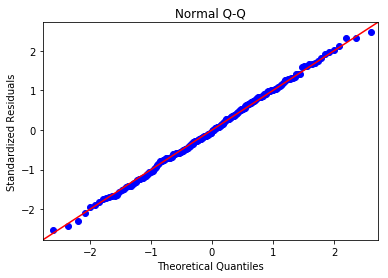

In [49]:
res = model6.resid
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals');
plt.show() 

In [50]:
df_train1= x_train1.filter(['CO2', 'N2O', 'CFC12', 'Aerosols'])
df_test1= x_test1.filter(['CO2', 'N2O', 'CFC12', 'Aerosols'])
df_train1.isna().sum().sum(), df_test1.isna().sum().sum()


(0, 0)

In [51]:
model7 = sm.OLS(y_train,df_train1).fit()
# Note the Swap of X and Y 
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     10.44
Date:                Tue, 04 Dec 2018   Prob (F-statistic):            0.00143
Time:                        17:20:36   Log-Likelihood:                -51.999
No. Observations:                 215   AIC:                             106.0
Df Residuals:                     214   BIC:                             109.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Aerosols       1.8243      0.565      3.231      0.001       0.711       2.937
==============================================================================
Omnibus:                       12.751   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.873
Skew:                          -0.154   Prob(JB):                       0.0530
Kurtosis:                       2.251   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
predictions7  = model7.predict(df_test1)

tmp7 = pd.Series({'Model': " Specified model ",
                 'R-Squared Value' : model7.rsquared,
                 'Adj.R-Squared Value': model7.rsquared_adj,
                 'RMSE': rmse(predictions7, y_test),
                 'MAPE': mean_absolute_percentage_error(predictions7, y_test)})

model7_report = models_report.append(tmp7, ignore_index = True)
model7_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE,MAPE
0,Specified model,0.046503,0.042048,0.299818,4188.541486


In [53]:
# Comparison of various model
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE','MAPE']
clas_model = pd.DataFrame(columns = cols)
clas_model = clas_model.append([model1_report,model3_report,model6_report,model7_report])
clas_model

,Model,R-Squared Value,Adj.R-Squared Value,RMSE,MAPE
0,Base Linear Regression Model,0.913504,0.909285,0.089079,383.112562
0,LRM after removing VIF above 100,0.531189,0.524555,0.204127,134.883079
0,LRM after removing Insignificant Variables,0.531189,0.524555,0.204127,134.883079
0,Specified model,0.046503,0.042048,0.299818,4188.541486


In [ ]:
Q1)	Find the correlations between all the variables in the dataset except Date & Month. Which of the following independent variables is N2O highly correlated with (absolute correlation greater than 0.7)? 
   
    ANSWER)CO2, CH4, CFC-12


In [ ]:
Q2)	What is Multicollinearity? Does Multicollinearity exist in this Data?
ANSWER) Two independent variables are co related then its called Multicollinearity. Yes, it does 


In [ ]:
Q3)	Which variables are highly correlated with the Dependent Variable? Is Co-relation god or bad for the Model? Why?
 ANSER) N2O AND Co2 are highly correlated . Co relation is not good for model. It tends to make model imbalance  towards the other side


In [ ]:
Q8)	What is the Hypothesis test in case of a Linear Regression?
ANSERR) Hypothsis Test in Linear Regression and logistic 
Here we assume that variable is not important 
the variable is insignificant i.e., Beta (B) = 0
eg: y x1 x2
y = b0 +b1x1 + b2x2 
x2 is given variable then we do b2 = 0 that means x2 is insignificant 
Then we find p value then <5% then we reject null hypothesis and tell that the variable is important in the model


In [ ]:
Q9)	What do the P values represent? Do we look for low or High P values? Why?
ANSWER)  The P value, or calculated probability, is the probability of finding the observed, p value is probaility or signficant value
plow H0 go  Reject the null below 5%
phigh ho fly


In [ ]:
Q10)	What is an F Test in Linear Regression? Discuss.
ANSER) The F-test in Linear regression is whether your linear regression model provides a better fit to the data than a model that contains no independent variables. R-squared tells you how well your model fits the data, and the F-test is related to it.
